In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
data = pd.read_csv("cw1a.csv", comment="#")
base_current = data['Ib (A)']
base_emiter_voltage = data['Vbe (V)']

thermal_voltage = 0.026


In [4]:
def Ib(ube, i_s, eta):
    return i_s*(np.exp(ube/(eta*thermal_voltage)) - 1)

In [5]:
popt, pcov = curve_fit(Ib, xdata = base_emiter_voltage, ydata = base_current, p0=[2e-20, 1.5])
i_s, eta = popt
i_s, eta

(2.436434893667649e-15, 1.1794564995151595)

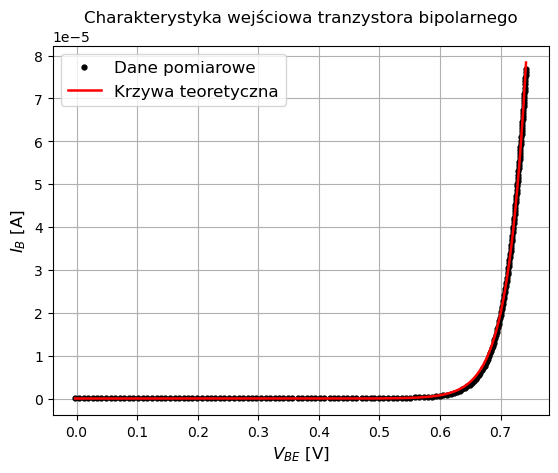

In [6]:
plt.plot(base_emiter_voltage, base_current, marker = 'o', color = 'black', markersize = 3.5, label = 'Dane pomiarowe', linestyle = ' ')
plt.plot(base_emiter_voltage, Ib(base_emiter_voltage, popt[0], popt[1]), color = 'red', linewidth = 1.8, label = 'Krzywa teoretyczna')
plt.ylabel(r"$I_{B}$ [A]", fontsize = 12)
plt.xlabel(r"$V_{BE}$ [V]", fontsize = 12)
plt.title("Charakterystyka wejściowa tranzystora bipolarnego")
plt.legend(fontsize = 12)
plt.grid()

In [7]:
data = pd.read_csv("cw1b.csv", comment="#")
collector_current_1b = data['Ic (A)']
index_where_ic_ge_0 = np.where(collector_current_1b == 6.284813046903224e-05)[0][0]

$r_{be}$ low signal

In [8]:
numpy_cc = np.array(collector_current_1b)
numpy_vbe = np.array(base_emiter_voltage)
numpy_bc = np.array(base_current)
d_Ib = np.diff(numpy_bc)
d_Ube = np.diff(numpy_vbe)
d_Ic = np.diff(numpy_cc)

In [9]:
beta = abs(d_Ic/d_Ib)
gm_def = abs(d_Ic/d_Ube)
gm_lowsignal = abs(collector_current_1b[index_where_ic_ge_0:]/thermal_voltage)
gm_lowsignal[:-1].size

C:\Users\szcis\AppData\Local\Temp\ipykernel_10740\2019339696.py:2: RuntimeWarning: divide by zero encountered in divide
  gm_def = abs(d_Ic/d_Ube)


118

In [10]:
import matplotlib.ticker as ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Ustawienia dla notacji naukowej

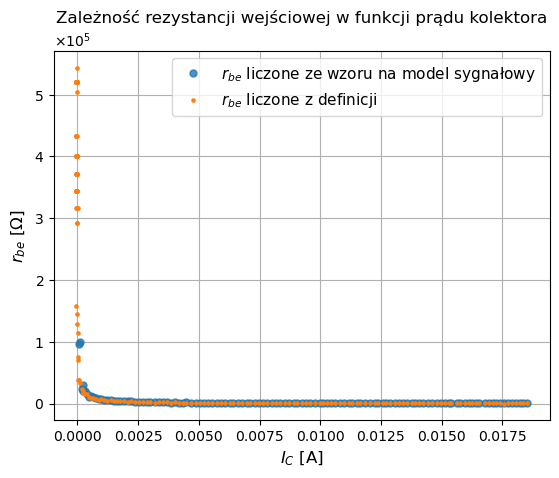

In [11]:
plt.plot(collector_current_1b[index_where_ic_ge_0:-1], beta[index_where_ic_ge_0:]/gm_lowsignal[:-1], marker = 'o', linestyle = '', markersize = 5, alpha = 0.8, label = r'$r_{be}$ liczone ze wzoru na model sygnałowy')
plt.plot(collector_current_1b[:-1], abs(d_Ube/d_Ib), marker = 'o', linestyle = '', markersize = 2.3, label = r'$r_{be}$ liczone z definicji')
plt.grid()
plt.xlabel(r"$I_{C}$ [A]", fontsize = 12)
plt.ylabel(r"$r_{be}$ [$\Omega$]", fontsize = 12)
plt.title("Zależność rezystancji wejściowej w funkcji prądu kolektora")
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(fontsize = 11)

In [12]:
data = pd.read_csv("cw1b.csv", comment="#")
collector_current = data['Ic (A)']
base_emiter_voltage = data['Vbe (V)']

In [13]:
def Ic(Ube, beta, Is, eta):
    return beta*Is*(np.exp(Ube/(eta*0.026)) - 1)

In [14]:
popt, _ = curve_fit(Ic, xdata = base_emiter_voltage, ydata = collector_current, p0=[120, 2e-15, 1.15])
beta, saturation_current, ideality_factor = popt
popt, pcov

(array([2.63113746e+02, 4.37657635e-15, 1.20758981e+00]),
 array([[2.82024895e-32, 5.72595616e-19],
        [5.72595616e-19, 1.16279924e-05]]))

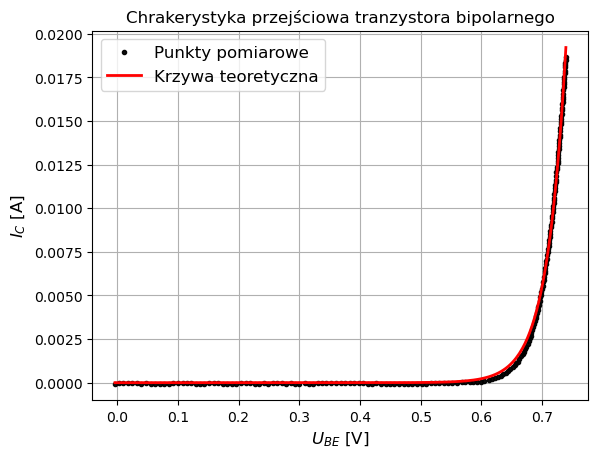

In [15]:
plt.plot(base_emiter_voltage, collector_current, color = 'black', linestyle = '', marker = 'o', markersize = 3, label = 'Punkty pomiarowe', alpha = 0.95)
plt.plot(base_emiter_voltage, Ic(base_emiter_voltage, beta, saturation_current, ideality_factor), color = 'red', linewidth = 2, label = 'Krzywa teoretyczna')
plt.xlabel(r"$U_{BE}$ [V]", fontsize = 12)
plt.ylabel(r"$I_{C}$ [A]", fontsize = 12)
plt.title("Chrakerystyka przejściowa tranzystora bipolarnego")
plt.legend(fontsize = 12)
plt.grid()

In [16]:
def gm(Ube):
    return ((beta*saturation_current)/(eta * thermal_voltage))*np.exp(Ube/(eta*thermal_voltage))

In [17]:
beta_lowsignal = (collector_current[len(collector_current) - 1] - collector_current[0])/(base_current[len(base_current) - 1] - base_current[0])

gm_lowsignal = collector_current/thermal_voltage
beta_lowsignal

243.85962401071637

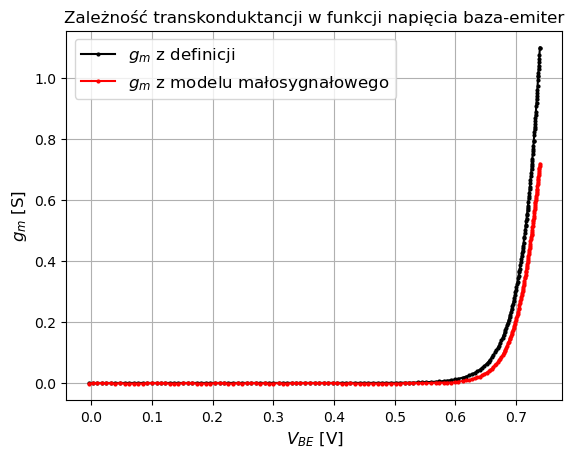

In [18]:
plt.plot(base_emiter_voltage, gm(base_emiter_voltage), color = 'black', label = r'$g_{m}$ z definicji', markersize = 2, marker = 'o')
plt.plot(base_emiter_voltage, gm_lowsignal, color = 'red', label = r'$g_{m}$ z modelu małosygnałowego', markersize = 2, marker = 'o')
plt.ylabel(r"$g_{m}$ [S]", fontsize = 12)
plt.xlabel(r"$V_{BE}$ [V]", fontsize = 12)
plt.title("Zależność transkonduktancji w funkcji napięcia baza-emiter")
plt.legend(fontsize = 12)
plt.grid()

In [29]:
data = pd.read_csv("cw1c.csv", comment="#")
collector_current = np.array_split(data['Ic (A)'], 6)
collector_emiter_base_voltage = np.array_split(data['Vce (V)'], 6)
vbe_lables = ["600 mV", "800 mV", "1000 mV", "1200 mV", "1400 mV", "1600 mV"]
collector_emiter_base_voltage = np.array(collector_emiter_base_voltage)
x = collector_emiter_base_voltage[1]

f:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Text(0.5, 1.0, 'Charakterystyka wyjściowa tranzystora bipolarnego')

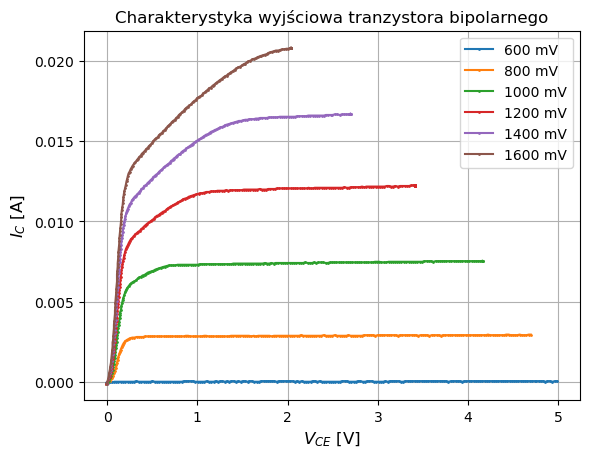

In [20]:
for i in range(0, 6):
    plt.plot(collector_emiter_base_voltage[i], collector_current[i], marker = 'o', markersize = 1, label = vbe_lables[i])
plt.grid()
plt.legend()
plt.xlabel(r"$V_{CE}$ [V]", fontsize = 12)
plt.ylabel(r"$I_{C}$ [A]", fontsize = 12)
plt.title("Charakterystyka wyjściowa tranzystora bipolarnego")

In [21]:
from scipy.stats import linregress
vrc = data['Vrc (V)']
np.where(vrc == 0.55)
early = np.empty(4)

In [22]:
fit = linregress(collector_emiter_base_voltage[1][(223-201):201], collector_current[1][(223-201):201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[0] = abs(-fit.intercept/fit.slope)

Slope: 2.4962963709448163e-05
Intercept: 0.0028284153298932684


In [23]:
index = np.where(vrc == 1.425)[0][0]
fit = linregress(collector_emiter_base_voltage[2][index:201], collector_current[2][index:201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[1] = abs(-fit.intercept/fit.slope)

Slope: 7.048676458337069e-05
Intercept: 0.007258412219431358


In [24]:
index = np.where(vrc == 2.3)[0][0]
fit = linregress(collector_emiter_base_voltage[3][index:201], collector_current[3][index:201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[2] = abs(-fit.intercept/fit.slope)

Slope: 0.00014138242807985545
Intercept: 0.011745424028883499


In [25]:
index = np.where(vrc == 3.1)[0][0]
fit = linregress(collector_emiter_base_voltage[4][index:201], collector_current[4][index:201])
print(f"Slope: {fit.slope}\nIntercept: {fit.intercept}")
early[3] = abs(-fit.intercept/fit.slope)

Slope: 0.0002726496000966047
Intercept: 0.015945167607022116


In [26]:
np.mean(early), early

(89.45945749787789,
 array([113.30446828, 102.97553395,  83.07555747,  58.48227029]))